#Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

## Example title
(##) for titles

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [1]:
2 + 2

4

In [2]:
1 + 1

2

In [3]:
2+2

4

Doesn't matter the spaces

Sometimes there is no result to be printed, as is the case with assignment.

In [4]:
X = 2

In [5]:
Y = 5

Assign a value doesn't print it, thus this last cell doesn't print anything

In [6]:
X

2

In [7]:
Y

5

All cells impact each other

Remember that only the result from the last line is printed.

In [8]:
2 + 2
3 + 3

6

In [9]:
4 + 4
5 + 5

10

However, you can print whichever lines you want using the `print` statement.

In [10]:
print 2 + 2
3 + 3

4


6

In [11]:
print 4 + 4
print 5 + 5

8
10


We can use just one print to print everything (save code)

##Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

In [12]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

In [13]:
d = 1
for i in range(1,10):
    d = d * i
d

362880

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

`numpy` is like a mathematical library. It has mathematical functions incorportated and is used for working with arrays

`pandas` is a library used for data analysis

In [14]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

In [15]:
import mymodule as md

SandboxViolation: Importing mymodule raised ImportError. No modules or attributes with a similar name were found. You tried to import a module that is not whitelisted on Quantopian. To see the list of allowed modules in the IDE, go to https://www.quantopian.com/docs/whitelists/ide-whitelist#algo-ide-whitelist. To see the list of additional modules allowed in Research, go to https://www.quantopian.com/docs/whitelists/research-whitelist#research-whitelist.

import does't as print (not saving code)

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [ ]:
np.random.

In [16]:
np.random.normal

<function RandomState.normal>

In [17]:
np.random.randint

<function RandomState.randint>

##Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [18]:
np.random.normal?

TypeError: argument of type 'NoneType' is not iterable

In [14]:
np.random.randint?

TypeError: argument of type 'NoneType' is not iterable

##Sampling

We'll sample some random data using a function from `numpy`.

In [19]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

In [20]:
# Sample 200 points with a mean of 0 and an std of 1. This is a standard normal distribution.
Y = np.random.normal(0, 1, 200)

By the documentation, we know np.random.normal(location, scale, size of the sample)

The sample is random

##Plotting

We can use the plotting library we imported as follows.

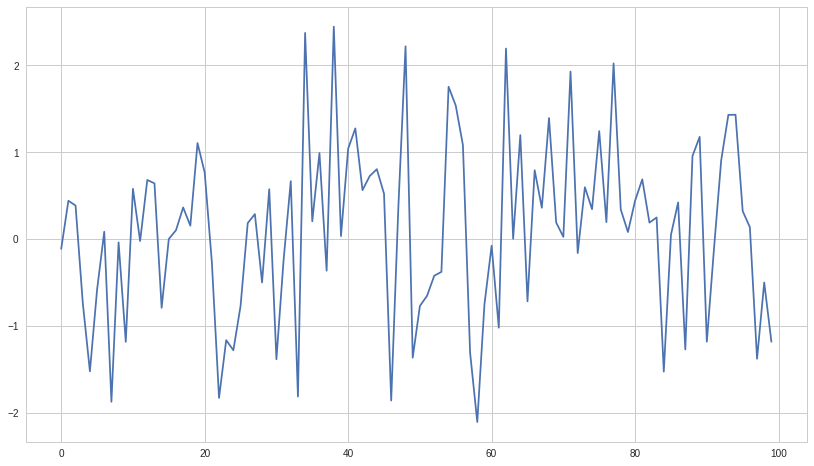

In [21]:
plt.plot(X)

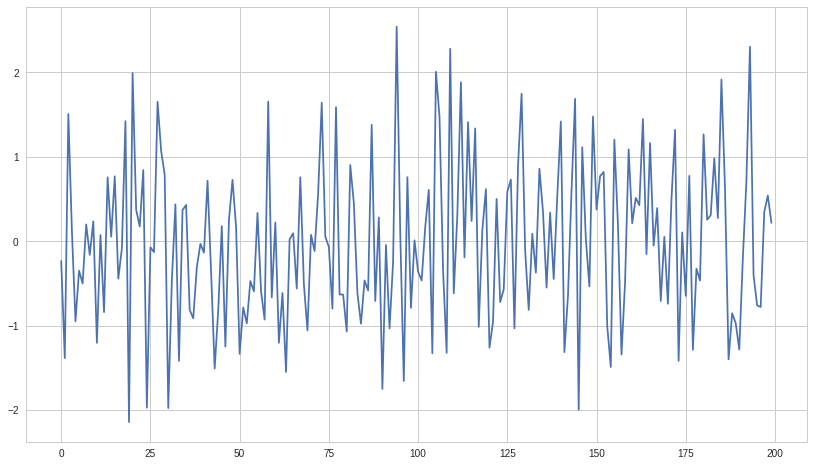

In [22]:
plt.plot(Y)

As it's name says, plot is for grafics but it also retuns a plot object. In this case [<matplotlib.lines.Line2D at 0x7f52a2e7e860>]

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

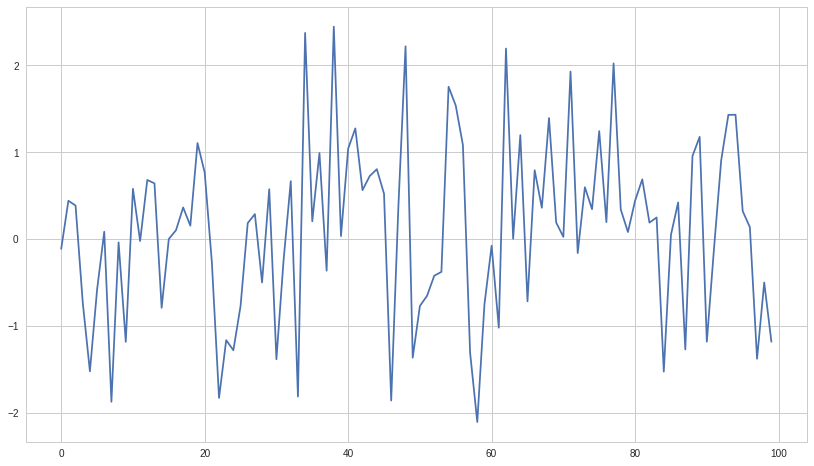

In [23]:
plt.plot(X);

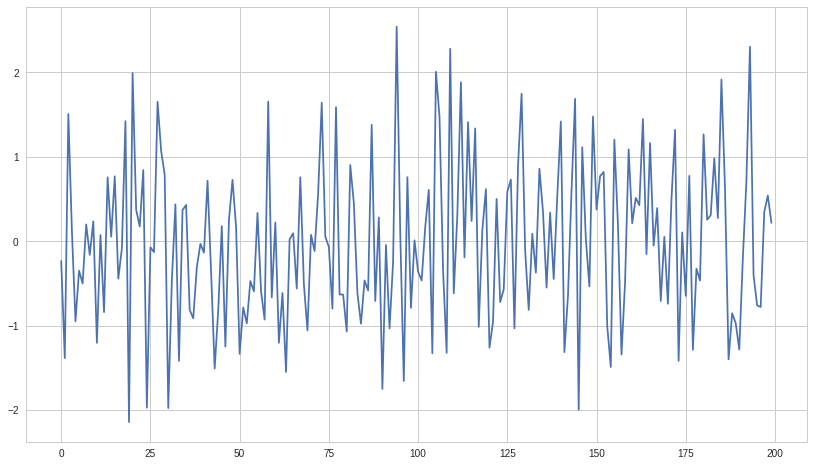

In [24]:
plt.plot(Y);

This eliminates the plot object (;)

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

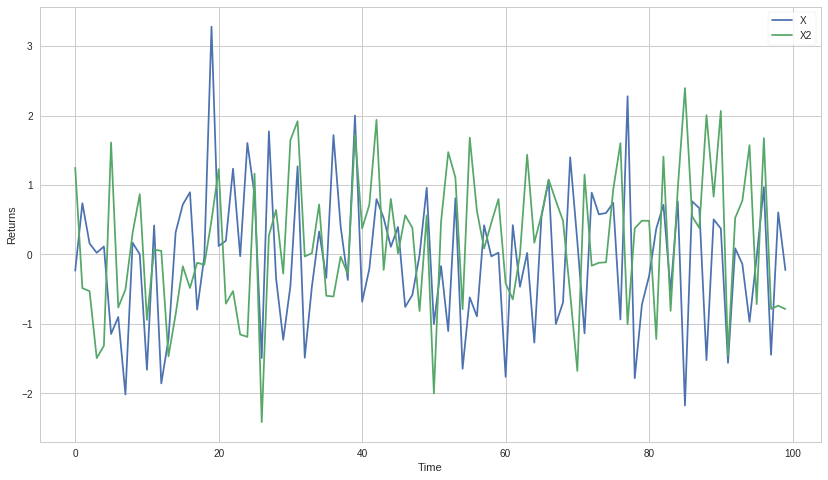

In [25]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

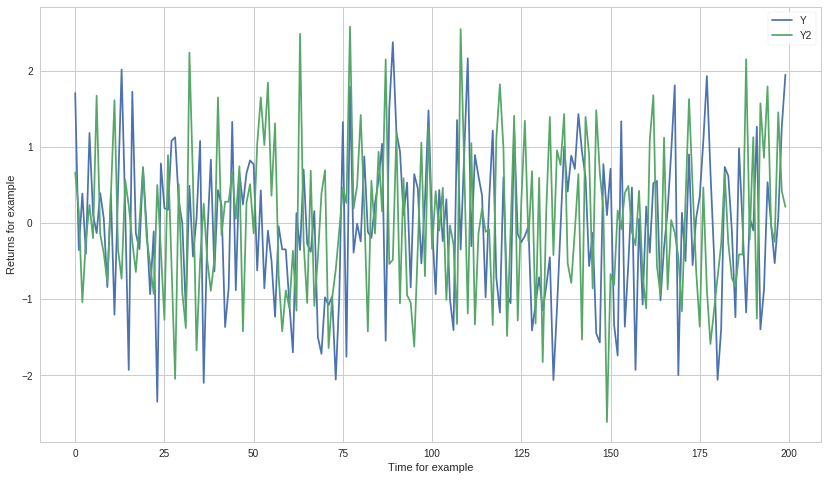

In [26]:
Y = np.random.normal(0, 1, 200)
Y2 = np.random.normal(0, 1, 200)

plt.plot(Y);
plt.plot(Y2);
plt.xlabel('Time for example') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns for example')
plt.legend(['Y', 'Y2']);

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [27]:
np.mean(X)

-0.055446995888599387

In [28]:
np.std(X)

1.0063749437516654

Average and standard, respectively

In [29]:
np.mean(Y)

-0.047334753267928666

In [30]:
np.std(Y)

0.97311361036115396

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [31]:
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')

In [32]:
data_later = get_pricing('MSFT', start_date='2015-6-1', end_date='2018-11-1')

Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [33]:
data

,open_price,high,low,close_price,volume,price
2012-01-03 00:00:00+00:00,24.065,24.436,23.920,24.319,60891291.0,24.319
2012-01-04 00:00:00+00:00,24.309,24.899,24.273,24.826,76534029.0,24.826
2012-01-05 00:00:00+00:00,24.817,25.133,24.736,25.080,53479335.0,25.080
2012-01-06 00:00:00+00:00,24.953,25.551,24.949,25.488,91671771.0,25.488
2012-01-09 00:00:00+00:00,25.424,25.470,25.125,25.143,56352965.0,25.143
2012-01-10 00:00:00+00:00,25.316,25.515,25.152,25.234,54223945.0,25.234
2012-01-11 00:00:00+00:00,24.862,25.361,24.808,25.125,62855941.0,25.125
2012-01-12 00:00:00+00:00,25.261,25.397,25.057,25.379,46186121.0,25.379
2012-01-13 00:00:00+00:00,25.316,25.606,25.189,25.606,55326851.0,25.606
2012-01-17 00:00:00+00:00,25.742,25.968,25.533,25.615,66537766.0,25.615


In [34]:
data_later

,open_price,high,low,close_price,volume,price
2015-06-01 00:00:00+00:00,43.647,44.305,43.238,43.813,24322867.0,43.813
2015-06-02 00:00:00+00:00,43.526,43.916,43.238,43.517,17566224.0,43.517
2015-06-03 00:00:00+00:00,43.934,44.273,43.424,43.461,24616733.0,43.461
2015-06-04 00:00:00+00:00,43.396,43.739,42.849,43.016,23376690.0,43.016
2015-06-05 00:00:00+00:00,42.951,43.146,42.515,42.803,22346793.0,42.803
2015-06-08 00:00:00+00:00,42.942,43.062,42.357,42.422,18382858.0,42.422
2015-06-09 00:00:00+00:00,42.441,42.608,42.163,42.330,19037811.0,42.330
2015-06-10 00:00:00+00:00,42.469,43.433,42.376,43.211,22045609.0,43.211
2015-06-11 00:00:00+00:00,43.276,43.517,42.784,43.072,21682580.0,43.072
2015-06-12 00:00:00+00:00,42.867,43.099,42.571,42.636,19159861.0,42.636


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [35]:
X = data['price']

In [36]:
Y = data_later['price']

In [37]:
X

2012-01-03 00:00:00+00:00    24.319
2012-01-04 00:00:00+00:00    24.826
2012-01-05 00:00:00+00:00    25.080
2012-01-06 00:00:00+00:00    25.488
2012-01-09 00:00:00+00:00    25.143
2012-01-10 00:00:00+00:00    25.234
2012-01-11 00:00:00+00:00    25.125
2012-01-12 00:00:00+00:00    25.379
2012-01-13 00:00:00+00:00    25.606
2012-01-17 00:00:00+00:00    25.615
2012-01-18 00:00:00+00:00    25.588
2012-01-19 00:00:00+00:00    25.497
2012-01-20 00:00:00+00:00    26.929
2012-01-23 00:00:00+00:00    26.947
2012-01-24 00:00:00+00:00    26.594
2012-01-25 00:00:00+00:00    26.802
2012-01-26 00:00:00+00:00    26.748
2012-01-27 00:00:00+00:00    26.485
2012-01-30 00:00:00+00:00    26.838
2012-01-31 00:00:00+00:00    26.775
2012-02-01 00:00:00+00:00    27.092
2012-02-02 00:00:00+00:00    27.142
2012-02-03 00:00:00+00:00    27.391
2012-02-06 00:00:00+00:00    27.373
2012-02-07 00:00:00+00:00    27.518
2012-02-08 00:00:00+00:00    27.790
2012-02-09 00:00:00+00:00    27.890
2012-02-10 00:00:00+00:00   

In [38]:
Y

2015-06-01 00:00:00+00:00     43.813
2015-06-02 00:00:00+00:00     43.517
2015-06-03 00:00:00+00:00     43.461
2015-06-04 00:00:00+00:00     43.016
2015-06-05 00:00:00+00:00     42.803
2015-06-08 00:00:00+00:00     42.422
2015-06-09 00:00:00+00:00     42.330
2015-06-10 00:00:00+00:00     43.211
2015-06-11 00:00:00+00:00     43.072
2015-06-12 00:00:00+00:00     42.636
2015-06-15 00:00:00+00:00     42.181
2015-06-16 00:00:00+00:00     42.496
2015-06-17 00:00:00+00:00     42.636
2015-06-18 00:00:00+00:00     43.322
2015-06-19 00:00:00+00:00     42.682
2015-06-22 00:00:00+00:00     42.886
2015-06-23 00:00:00+00:00     42.571
2015-06-24 00:00:00+00:00     42.320
2015-06-25 00:00:00+00:00     42.339
2015-06-26 00:00:00+00:00     41.986
2015-06-29 00:00:00+00:00     41.170
2015-06-30 00:00:00+00:00     40.948
2015-07-01 00:00:00+00:00     41.222
2015-07-02 00:00:00+00:00     41.170
2015-07-06 00:00:00+00:00     41.179
2015-07-07 00:00:00+00:00     41.087
2015-07-08 00:00:00+00:00     41.040
2

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

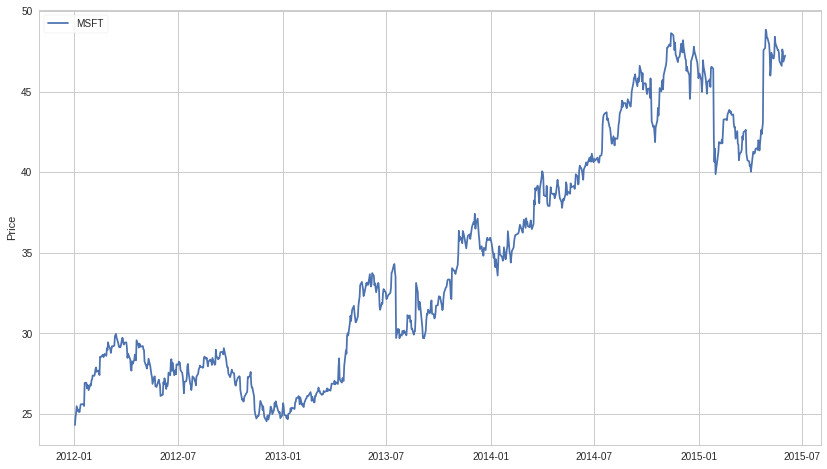

In [39]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

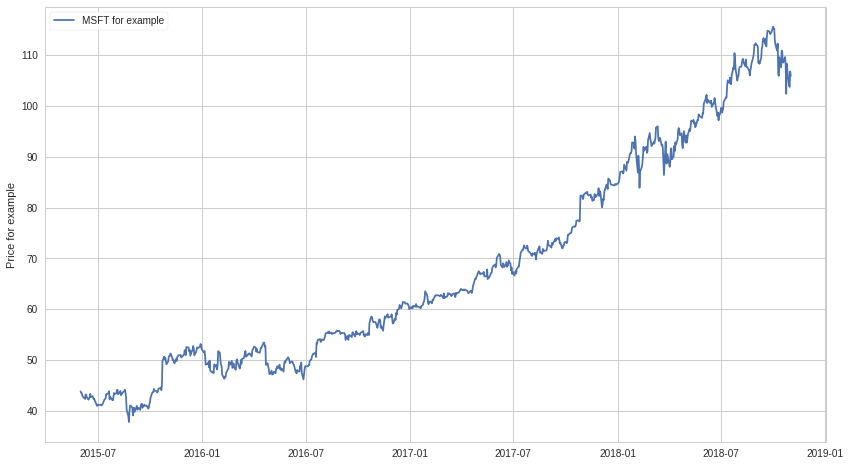

In [40]:
plt.plot(Y.index, Y.values)
plt.ylabel('Price for example')
plt.legend(['MSFT for example']);

We can get statistics again on real data.

In [41]:
np.mean(X)

34.49160093348889

In [42]:
np.std(X)

7.309055602383863

Real average and standard, respectively

In [43]:
np.mean(Y)

68.01275375722543

In [44]:
np.std(Y)

21.14094576341688

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [45]:
 X.pct_change()

2012-01-03 00:00:00+00:00         NaN
2012-01-04 00:00:00+00:00    0.020848
2012-01-05 00:00:00+00:00    0.010231
2012-01-06 00:00:00+00:00    0.016268
2012-01-09 00:00:00+00:00   -0.013536
2012-01-10 00:00:00+00:00    0.003619
2012-01-11 00:00:00+00:00   -0.004320
2012-01-12 00:00:00+00:00    0.010109
2012-01-13 00:00:00+00:00    0.008944
2012-01-17 00:00:00+00:00    0.000351
2012-01-18 00:00:00+00:00   -0.001054
2012-01-19 00:00:00+00:00   -0.003556
2012-01-20 00:00:00+00:00    0.056163
2012-01-23 00:00:00+00:00    0.000668
2012-01-24 00:00:00+00:00   -0.013100
2012-01-25 00:00:00+00:00    0.007821
2012-01-26 00:00:00+00:00   -0.002015
2012-01-27 00:00:00+00:00   -0.009833
2012-01-30 00:00:00+00:00    0.013328
2012-01-31 00:00:00+00:00   -0.002347
2012-02-01 00:00:00+00:00    0.011839
2012-02-02 00:00:00+00:00    0.001846
2012-02-03 00:00:00+00:00    0.009174
2012-02-06 00:00:00+00:00   -0.000657
2012-02-07 00:00:00+00:00    0.005297
2012-02-08 00:00:00+00:00    0.009884
2012-02-09 0

In [46]:
 X.pct_change()[1:]

2012-01-04 00:00:00+00:00    0.020848
2012-01-05 00:00:00+00:00    0.010231
2012-01-06 00:00:00+00:00    0.016268
2012-01-09 00:00:00+00:00   -0.013536
2012-01-10 00:00:00+00:00    0.003619
2012-01-11 00:00:00+00:00   -0.004320
2012-01-12 00:00:00+00:00    0.010109
2012-01-13 00:00:00+00:00    0.008944
2012-01-17 00:00:00+00:00    0.000351
2012-01-18 00:00:00+00:00   -0.001054
2012-01-19 00:00:00+00:00   -0.003556
2012-01-20 00:00:00+00:00    0.056163
2012-01-23 00:00:00+00:00    0.000668
2012-01-24 00:00:00+00:00   -0.013100
2012-01-25 00:00:00+00:00    0.007821
2012-01-26 00:00:00+00:00   -0.002015
2012-01-27 00:00:00+00:00   -0.009833
2012-01-30 00:00:00+00:00    0.013328
2012-01-31 00:00:00+00:00   -0.002347
2012-02-01 00:00:00+00:00    0.011839
2012-02-02 00:00:00+00:00    0.001846
2012-02-03 00:00:00+00:00    0.009174
2012-02-06 00:00:00+00:00   -0.000657
2012-02-07 00:00:00+00:00    0.005297
2012-02-08 00:00:00+00:00    0.009884
2012-02-09 00:00:00+00:00    0.003598
2012-02-10 0

In [47]:
Y.pct_change()

2015-06-01 00:00:00+00:00         NaN
2015-06-02 00:00:00+00:00   -0.006756
2015-06-03 00:00:00+00:00   -0.001287
2015-06-04 00:00:00+00:00   -0.010239
2015-06-05 00:00:00+00:00   -0.004952
2015-06-08 00:00:00+00:00   -0.008901
2015-06-09 00:00:00+00:00   -0.002169
2015-06-10 00:00:00+00:00    0.020813
2015-06-11 00:00:00+00:00   -0.003217
2015-06-12 00:00:00+00:00   -0.010123
2015-06-15 00:00:00+00:00   -0.010672
2015-06-16 00:00:00+00:00    0.007468
2015-06-17 00:00:00+00:00    0.003294
2015-06-18 00:00:00+00:00    0.016090
2015-06-19 00:00:00+00:00   -0.014773
2015-06-22 00:00:00+00:00    0.004780
2015-06-23 00:00:00+00:00   -0.007345
2015-06-24 00:00:00+00:00   -0.005896
2015-06-25 00:00:00+00:00    0.000449
2015-06-26 00:00:00+00:00   -0.008337
2015-06-29 00:00:00+00:00   -0.019435
2015-06-30 00:00:00+00:00   -0.005392
2015-07-01 00:00:00+00:00    0.006691
2015-07-02 00:00:00+00:00   -0.001261
2015-07-06 00:00:00+00:00    0.000219
2015-07-07 00:00:00+00:00   -0.002234
2015-07-08 0

In [48]:
R = X.pct_change()[1:]

In [49]:
#We remove the first data also
S = Y.pct_change()[2:]

We can plot the returns distribution as a histogram.

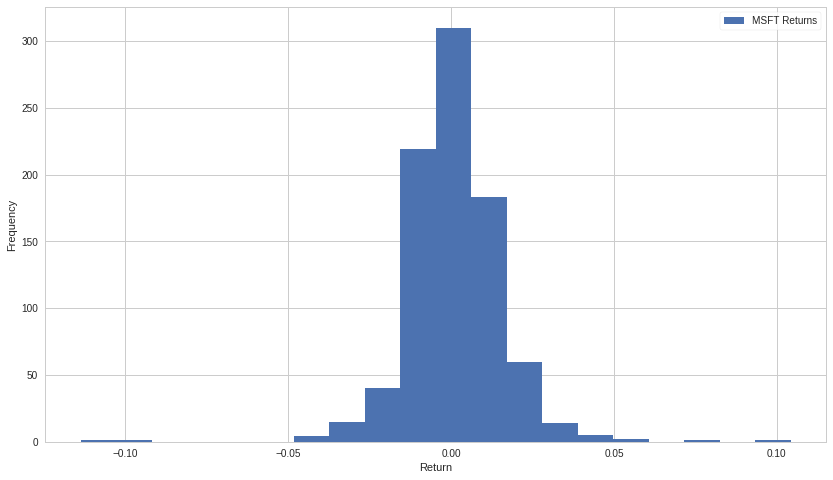

In [50]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

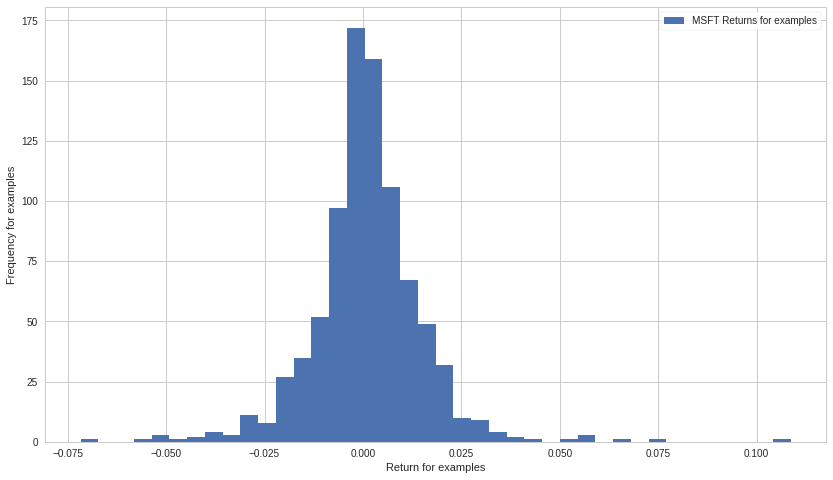

In [51]:
plt.hist(S, bins=40)
plt.xlabel('Return for examples')
plt.ylabel('Frequency for examples')
plt.legend(['MSFT Returns for examples']);

Get statistics again.

In [52]:
np.mean(R)

0.000879089143363588

In [53]:
np.std(R)

0.014347860964324364

In [54]:
np.mean(S)

0.001130980197180588

In [55]:
np.std(S)

0.014161950794245986

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

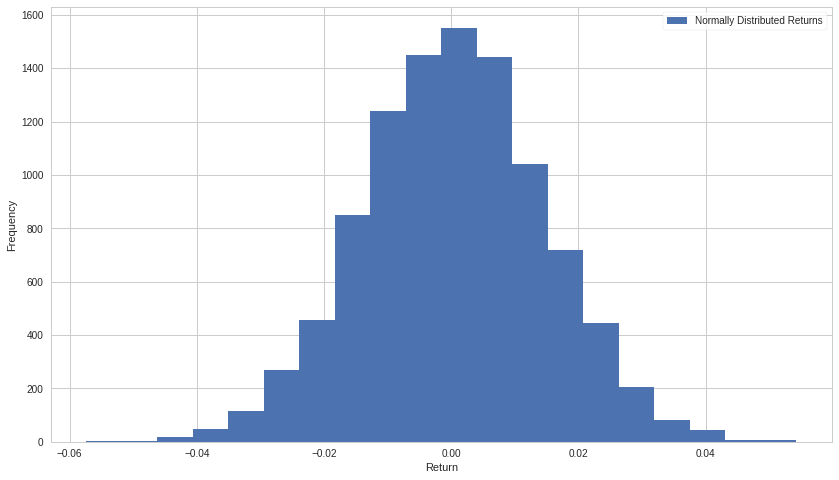

In [56]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

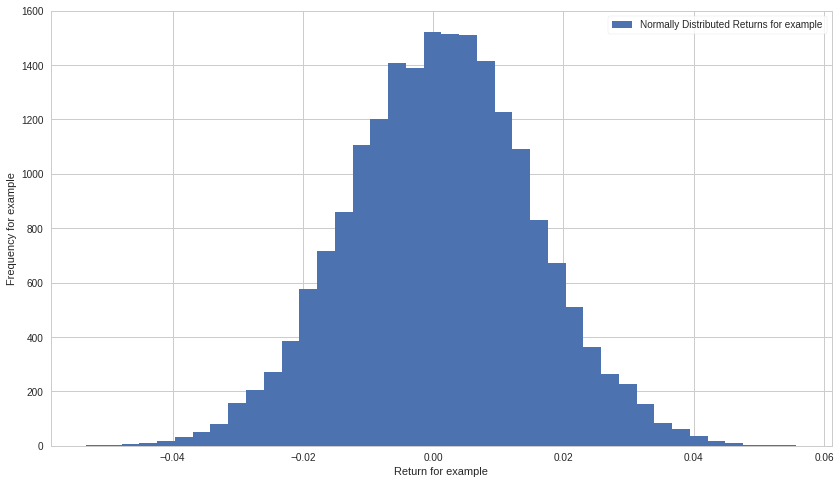

In [57]:
plt.hist(np.random.normal(np.mean(S), np.std(S), 20000), bins=40)
plt.xlabel('Return for example')
plt.ylabel('Frequency for example')
plt.legend(['Normally Distributed Returns for example']);

##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
  


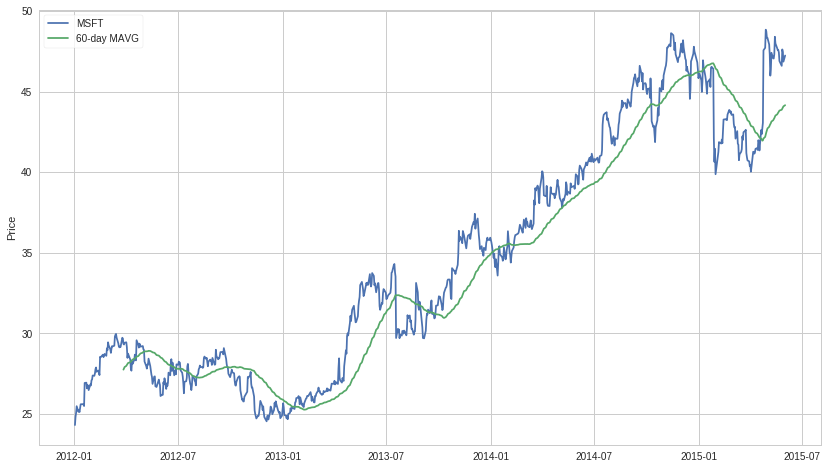

In [58]:
# Take the average of the last 60 days at each timepoint.
MAVG = pd.rolling_mean(X, window=60)
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=120).mean()
  


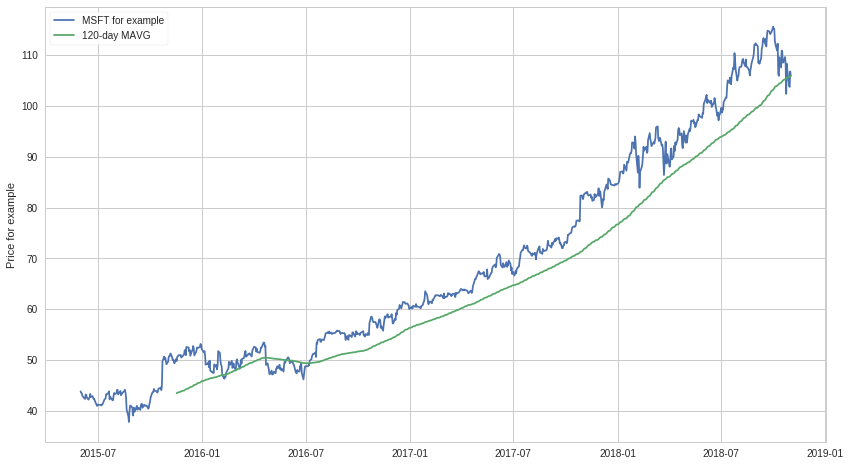

In [59]:
# Take the average of the last 120 days at each timepoint.
MAVG = pd.rolling_mean(Y, window=120)
plt.plot(Y.index, Y.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price for example')
plt.legend(['MSFT for example', '120-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.